In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df_review = pd.read_csv('IMDB-dataset.csv')

df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


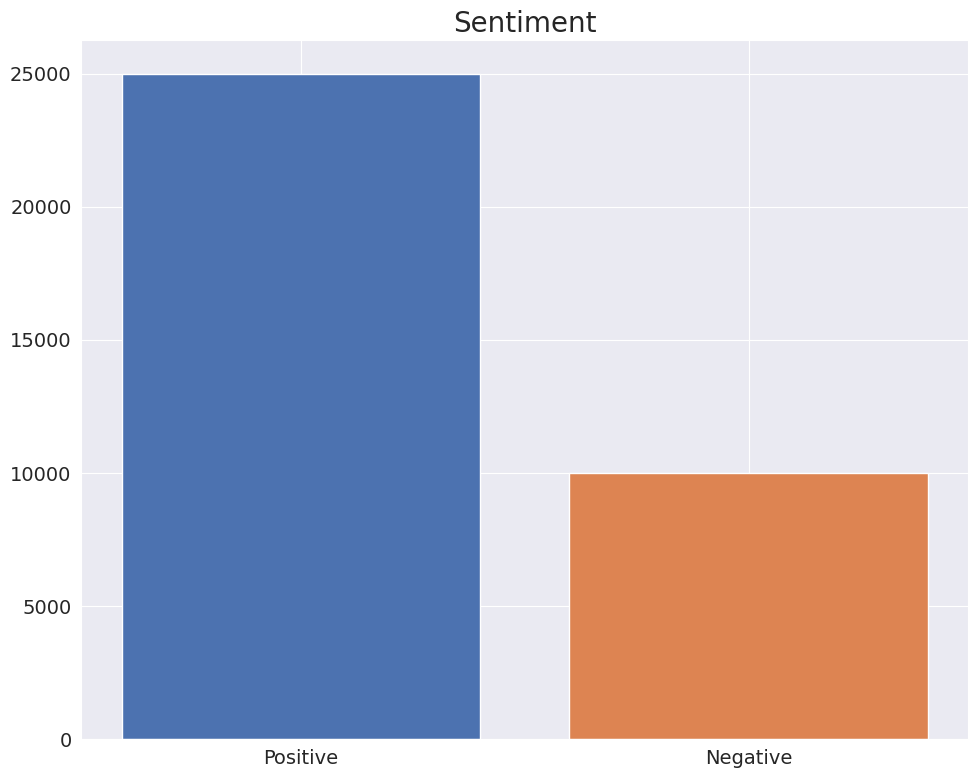

In [ ]:
df_positive = df_review[df_review['sentiment']=='positive'][:40000]
df_negative = df_review[df_review['sentiment']=='negative'][:10000]

df_review_imb = pd.concat([df_positive, df_negative])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('font', size=14)

colors = sns.color_palette('deep')

plt.figure(figsize=(10,8), tight_layout=True)
plt.bar(x=['Positive', 'Negative'], height=df_review_imb.value_counts(['sentiment']), color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')

plt.show()

In [ ]:
#Balancing the data set

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_review_imb[['review']], df_review_imb['sentiment'])

df_review_bal

print(df_review_imb.value_counts('sentiment'))
print('---------------')
print(df_review_bal.value_counts('sentiment'))

sentiment
positive    25000
negative    10000
dtype: int64
---------------
sentiment
negative    10000
positive    10000
dtype: int64


In [ ]:
#Splitting the dataset into train and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

print(test_y)

10650    positive
2041     negative
8668     negative
1114     negative
13902    positive
           ...   
5388     negative
749      negative
611      negative
13637    positive
11617    positive
Name: sentiment, Length: 6600, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

train_x_vector

test_x_vector = tfidf.transform(test_x)

pd.DataFrame.sparse.from_spmatrix(train_x_vector,index=train_x.index,columns=tfidf.get_feature_names_out())

,00,000,00001,001,006,007,00s,01,0148,02,...,époque,être,êxtase,ísnt,île,über,übermensch,überwoman,þór,żmijewski
7070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [ ]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [ ]:
#Mean accuracy

print('Support vector machine:', svc.score(test_x_vector, test_y))
print('Decision tree:', dec_tree.score(test_x_vector, test_y))
print('Naive bayes:', gnb.score(test_x_vector.toarray(), test_y))
print('Logistic regression:', log_reg.score(test_x_vector, test_y))

Support vector machine: 0.8721212121212121
Decision tree: 0.7093939393939394
Naive bayes: 0.6383333333333333
Logistic regression: 0.8736363636363637


In [ ]:
#F1 score (using the SVC model)

from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector), labels=['positive', 'negative'], average=None)

array([0.87289157, 0.87134146])

In [ ]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(test_y,svc.predict(test_x_vector), labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.86      0.89      0.87      3271
    negative       0.88      0.86      0.87      3329

    accuracy                           0.87      6600
   macro avg       0.87      0.87      0.87      6600
weighted avg       0.87      0.87      0.87      6600



In [ ]:
#Report the number of true positives, true negatives, false positives, and false negatives

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y, svc.predict(test_x_vector), labels=['positive', 'negative'])

conf_mat

array([[2898,  373],
       [ 471, 2858]])

In [ ]:
review = ["Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause"]
new_review = tfidf.transform(review)

svc.predict(new_review)

array(['positive'], dtype=object)

In [ ]:
import pickle
from sklearn.svm import SVC

# SVC modelinin eğitilmesi
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

# Modelin kaydedilmesi
filename = 'movie_reviews_sentiment_analysis.pkl'
pickle.dump(svc, open(filename, 'wb'))

# Kaydedilen modelin yüklenmesi
loaded_model = pickle.load(open(filename, 'rb'))



In [ ]:
# Test verisi oluşturma
review = ["I love it"]
new_review = tfidf.transform(review)

# Yüklenen model ile tahmin yapma
result = loaded_model.predict(new_review)
print(result)


['positive']
